## Step 1: Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load the dataset from Google drive

In [ ]:
!pip install gdown
import gdown

file_id = '1obcxN8IEwHnPrMXPLlaJtWlfggGCS4qT'  # File ID from the Google Drive sharing link
url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(url, 'Mental_Disorders_Identification.csv', quiet=False)

data = pd.read_csv("Mental_Disorders_Identification.csv")
data.head()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Downloading...
From: https://drive.google.com/uc?id=1obcxN8IEwHnPrMXPLlaJtWlfggGCS4qT
To: /content/Mental_Disorders_Identification.csv
100%|██████████| 589M/589M [00:05<00:00, 104MB/s] 


,title,selftext,created_utc,over_18,subreddit
0,Life is so pointless without others,Does anyone else think the most important part...,1650356960,False,BPD
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,1650356660,False,BPD
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,1650355379,False,BPD
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",1650353430,False,BPD
4,help,[removed],1650350907,False,BPD


## Step 3: Data preprocessing

### Remove unnecessary columns

In [ ]:
data = data.drop(columns=['created_utc', 'over_18'])

### Combine the title and selftext columns into a single text column

In [ ]:
# Combine the title and selftext columns into a single text column
data['title'] = data['title'].fillna('')
data['selftext'] = data['selftext'].fillna('')
data['text'] = data['title'] + ' ' + data['selftext']
data = data.drop(columns=['title', 'selftext'])

## Step 4: Sentiment analysis using TextBlob

In [ ]:
# Define a function to obtain sentiment polarity and subjectivity scores
# Modify the get_sentiment function to handle non-string values
def get_sentiment(text):
    if not isinstance(text, str):
        return 0, 0
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Define the sample size (e.g., 1000 rows)
sample_size = 1000

# Take a random sample of the dataset
subset_data = data.sample(sample_size, random_state=42)

# Apply the get_sentiment function to the text column of the subset
subset_data['polarity'], subset_data['subjectivity'] = zip(*subset_data['text'].apply(get_sentiment))

## Step 5: Visualizing sentiment analysis results

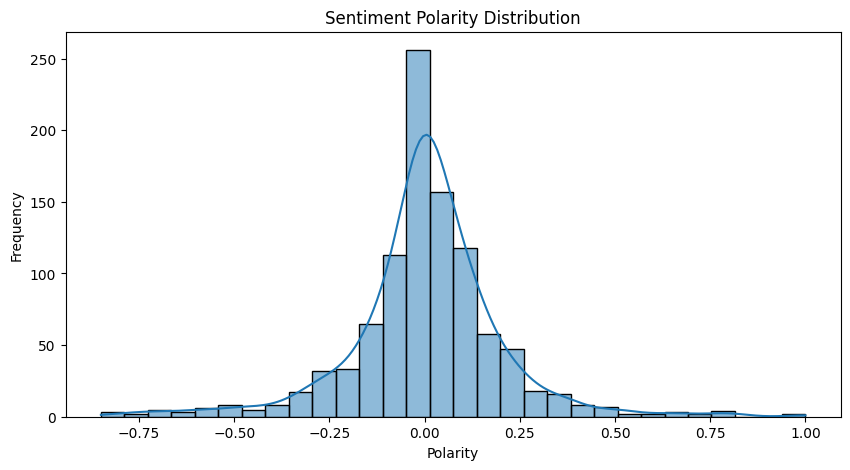

In [ ]:
# Visualize the distribution of sentiment polarity scores
plt.figure(figsize=(10, 5))
sns.histplot(data=subset_data, x='polarity', kde=True, bins=30)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

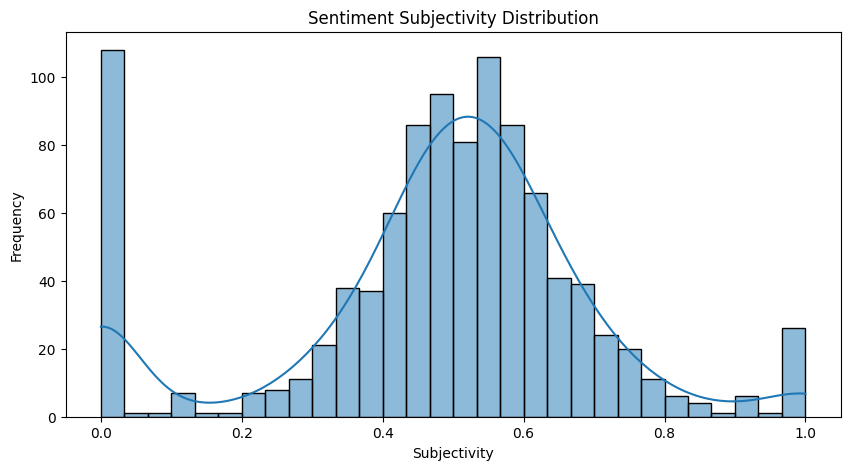

In [ ]:
# Visualize the distribution of sentiment subjectivity scores
plt.figure(figsize=(10, 5))
sns.histplot(data=subset_data, x='subjectivity', kde=True, bins=30)
plt.title('Sentiment Subjectivity Distribution')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

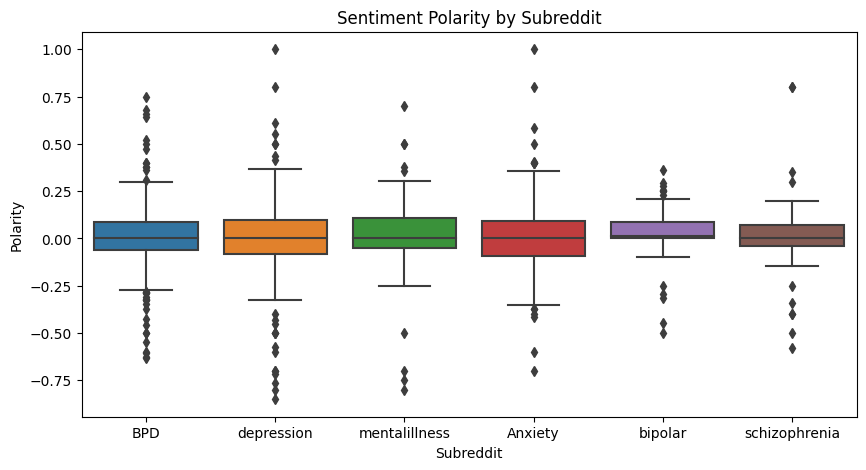

In [ ]:
# Visualize sentiment polarity scores by subreddit
plt.figure(figsize=(10, 5))
sns.boxplot(data=subset_data, x='subreddit', y='polarity')
plt.title('Sentiment Polarity by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Polarity')
plt.show()

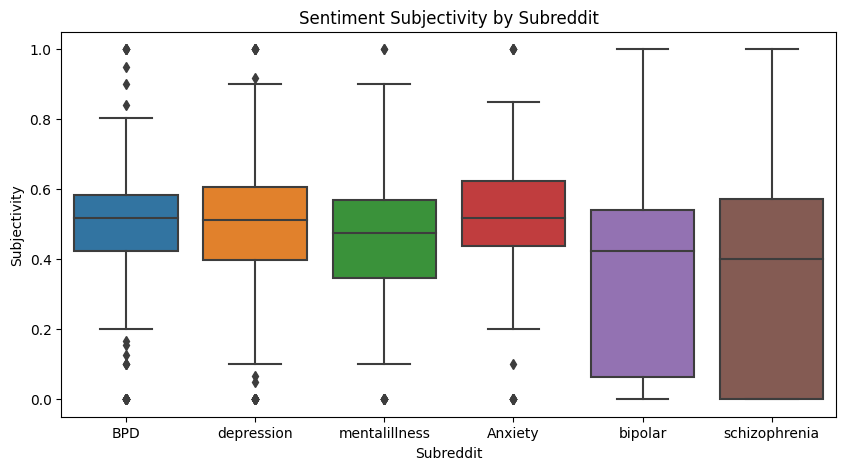

In [ ]:
# Visualize sentiment subjectivity scores by subreddit
plt.figure(figsize=(10, 5))
sns.boxplot(data=subset_data, x='subreddit', y='subjectivity')
plt.title('Sentiment Subjectivity by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Subjectivity')
plt.show()
